# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create lists to storage data
city_list = []
country = []
date = []
temp = []
lat = []
long = []
humidity = []
cloud = []
wind = []

In [4]:
#Create API to make the call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
base_url = f"{url}appid={weather_api_key}&units={units}&q="
base_url

'http://api.openweathermap.org/data/2.5/weather?appid=1a93c7c3f5a164b9beed55297dd43624&units=imperial&q='

In [5]:
# Set counters
counter = 0
set_counter = 1

print ("Beginning Data Retrieval")
print ("----------------------------------")

# Build the loop to perform a request for data on each city of the list
for city in cities:
    response = requests.get(base_url + city).json()
    print(f"Processing Record # : {counter} of Set {set_counter} | {city}")
    try:
        country.append(response['sys']['country'])
        date.append(response['dt'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        if counter >= 50:
            counter = 1
            set_counter += 1
            city_list.append(city)
        else:
            counter += 1
            city_list.append(city)
    except:
        print("City not found. Skipping request...")
        pass
    
print ("----------------------------------")
print ("Data Retrieval Complete")

Beginning Data Retrieval
----------------------------------
Processing Record # : 0 of Set 1 | puerto ayora
Processing Record # : 1 of Set 1 | deming
Processing Record # : 2 of Set 1 | castro
Processing Record # : 3 of Set 1 | xingcheng
Processing Record # : 4 of Set 1 | kavieng
Processing Record # : 5 of Set 1 | ilulissat
Processing Record # : 6 of Set 1 | college
Processing Record # : 7 of Set 1 | la brea
Processing Record # : 8 of Set 1 | nanortalik
Processing Record # : 9 of Set 1 | bealanana
Processing Record # : 10 of Set 1 | illoqqortoormiut
City not found. Skipping request...
Processing Record # : 10 of Set 1 | gunnedah
Processing Record # : 11 of Set 1 | busselton
Processing Record # : 12 of Set 1 | ranfurly
Processing Record # : 13 of Set 1 | albany
Processing Record # : 14 of Set 1 | ormara
Processing Record # : 15 of Set 1 | attawapiskat
City not found. Skipping request...
Processing Record # : 15 of Set 1 | tasiilaq
Processing Record # : 16 of Set 1 | dikson
Processing Rec

Processing Record # : 12 of Set 4 | kabare
Processing Record # : 13 of Set 4 | kodiak
Processing Record # : 14 of Set 4 | male
Processing Record # : 15 of Set 4 | penzance
Processing Record # : 16 of Set 4 | cabo san lucas
Processing Record # : 17 of Set 4 | bambanglipuro
Processing Record # : 18 of Set 4 | porosozero
Processing Record # : 19 of Set 4 | larnaca
Processing Record # : 20 of Set 4 | moundou
Processing Record # : 21 of Set 4 | lata
Processing Record # : 22 of Set 4 | bodmin
Processing Record # : 23 of Set 4 | bagdarin
Processing Record # : 24 of Set 4 | santiago del estero
Processing Record # : 25 of Set 4 | altamont
Processing Record # : 26 of Set 4 | tambun
Processing Record # : 27 of Set 4 | belyy yar
Processing Record # : 28 of Set 4 | ust-koksa
Processing Record # : 29 of Set 4 | vestmannaeyjar
Processing Record # : 30 of Set 4 | pangnirtung
Processing Record # : 31 of Set 4 | chapais
Processing Record # : 32 of Set 4 | sinnamary
Processing Record # : 33 of Set 4 | ru

Processing Record # : 26 of Set 7 | shuyskoye
Processing Record # : 27 of Set 7 | poum
Processing Record # : 28 of Set 7 | lorengau
Processing Record # : 29 of Set 7 | ngunguru
Processing Record # : 30 of Set 7 | yurginskoye
Processing Record # : 31 of Set 7 | goderich
Processing Record # : 32 of Set 7 | guerrero negro
Processing Record # : 33 of Set 7 | tatawin
Processing Record # : 34 of Set 7 | kuche
City not found. Skipping request...
Processing Record # : 34 of Set 7 | meyungs
City not found. Skipping request...
Processing Record # : 34 of Set 7 | vaitupu
City not found. Skipping request...
Processing Record # : 34 of Set 7 | langres
Processing Record # : 35 of Set 7 | hayden
Processing Record # : 36 of Set 7 | reftinskiy
Processing Record # : 37 of Set 7 | kargasok
Processing Record # : 38 of Set 7 | sabang
Processing Record # : 39 of Set 7 | donskoye
Processing Record # : 40 of Set 7 | babanusah
City not found. Skipping request...
Processing Record # : 40 of Set 7 | carroll
Proc

Processing Record # : 21 of Set 10 | labuan
Processing Record # : 22 of Set 10 | aykhal
Processing Record # : 23 of Set 10 | miri
Processing Record # : 24 of Set 10 | tairua
Processing Record # : 25 of Set 10 | deputatskiy
Processing Record # : 26 of Set 10 | steinbach
Processing Record # : 27 of Set 10 | arkhara
Processing Record # : 28 of Set 10 | wick
Processing Record # : 29 of Set 10 | shirokiy
Processing Record # : 30 of Set 10 | vilyuysk
Processing Record # : 31 of Set 10 | nemuro
Processing Record # : 32 of Set 10 | keti bandar
Processing Record # : 33 of Set 10 | viedma
Processing Record # : 34 of Set 10 | tchollire
Processing Record # : 35 of Set 10 | gribanovskiy
Processing Record # : 36 of Set 10 | tripoli
Processing Record # : 37 of Set 10 | jiroft
City not found. Skipping request...
Processing Record # : 37 of Set 10 | muskegon
Processing Record # : 38 of Set 10 | rio grande
Processing Record # : 39 of Set 10 | mount gambier
Processing Record # : 40 of Set 10 | atar
Proce

In [6]:
city_list

['puerto ayora',
 'deming',
 'castro',
 'xingcheng',
 'kavieng',
 'ilulissat',
 'college',
 'la brea',
 'nanortalik',
 'bealanana',
 'gunnedah',
 'busselton',
 'ranfurly',
 'albany',
 'ormara',
 'tasiilaq',
 'dikson',
 'kavaratti',
 'bredasdorp',
 'hithadhoo',
 'rikitea',
 'cayenne',
 'namibe',
 'grass valley',
 'port elizabeth',
 'punta arenas',
 'olafsvik',
 'oktyabrskoye',
 'nicoya',
 'bathsheba',
 'chokurdakh',
 'mauguio',
 'ponta do sol',
 'khatanga',
 'vaini',
 'mount isa',
 'bluff',
 'puyang',
 'kutum',
 'hilo',
 'mataura',
 'port alfred',
 'makakilo city',
 'bandarbeyla',
 'arman',
 'batagay-alyta',
 'kosonsoy',
 'arraial do cabo',
 'nagato',
 'thompson',
 'krasnoselkup',
 'vila franca do campo',
 'katsuura',
 'new norfolk',
 'jamestown',
 'ushuaia',
 'vostok',
 'sola',
 'vao',
 'hasaki',
 'outlook',
 'port blair',
 'okhotsk',
 'syracuse',
 'richards bay',
 'los llanos de aridane',
 'butaritari',
 'tiksi',
 'sao filipe',
 'biak',
 'wajir',
 'kapaa',
 'yellowknife',
 'santa vito

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create a data frame from cities, temperature, latitude, cloudiness and wind speed
weather_dict = {
    "City": city_list,
    "Country": country,
    "Date": date,
    "Temperature": temp,
    "Latitude": lat,
    "Longitude": long,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind
}

weather_data = pd.DataFrame(weather_dict)

In [8]:
#Export to csv
weather_data.to_csv('output_data/cities.csv',encoding = 'utf-8',index = False)

weather_data.count()

City           559
Country        559
Date           559
Temperature    559
Latitude       559
Longitude      559
Humidity       559
Cloudiness     559
Wind Speed     559
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Print dataframe
weather_data

,City,Country,Date,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
0,puerto ayora,EC,1627339976,76.96,-0.7393,-90.3518,83,46,7.00
1,deming,US,1627339976,91.29,32.2687,-107.7586,22,1,8.05
2,castro,BR,1627339976,58.44,-24.7911,-50.0119,65,4,4.41
3,xingcheng,CN,1627339977,77.38,40.6167,120.7167,87,96,3.36
4,kavieng,PG,1627339977,83.66,-2.5744,150.7967,69,42,7.54
...,...,...,...,...,...,...,...,...,...
554,danville,US,1627339882,88.23,36.5860,-79.3950,75,90,4.61
555,mersing,MY,1627340116,76.91,2.4312,103.8405,94,44,5.75
556,san quintin,MX,1627340117,72.55,30.4833,-115.9500,71,18,10.27
557,zacualpan,MX,1627340117,86.72,21.2500,-105.1667,79,92,6.15


In [10]:
# Check if any city has more than 100% humidity
weather_data.describe()

,Date,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
count,5.590000e+02,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,1.627340e+09,70.450966,20.752681,18.615491,70.703041,52.946333,7.987442
std,7.712998e+01,14.363544,32.654349,90.283633,21.056278,37.416823,5.666654
min,1.627339e+09,35.260000,-54.800000,-175.200000,6.000000,0.000000,0.000000
25%,1.627340e+09,60.515000,-6.219450,-57.886850,60.000000,15.000000,3.770000
50%,1.627340e+09,71.470000,27.257400,24.990600,76.000000,57.000000,6.910000
75%,1.627340e+09,80.535000,47.670300,97.116650,86.000000,90.000000,10.545000
max,1.627340e+09,108.540000,78.218600,179.316700,100.000000,100.000000,33.200000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

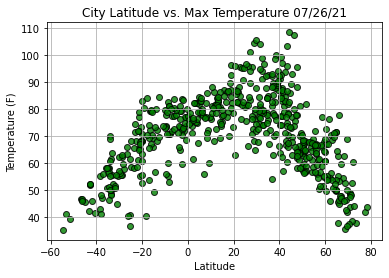

In [42]:
plt.scatter(weather_data["Latitude"], 
            weather_data["Temperature"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities", color ='green')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%m/%d/%y')}")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsTemperature.png")

### This graphic shows that the cities with -60, -40 and 60 in latitude has the same temperature. It also shows that the cities in latitudes between 20 and 40 have the highest max temperature.

## Latitude vs. Humidity Plot

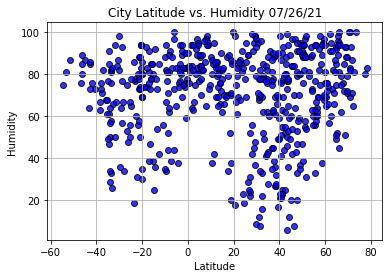

In [28]:
plt.scatter(weather_data["Latitude"], 
            weather_data["Humidity"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities", color ='blue')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {time.strftime('%m/%d/%y')}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsHumidity.png")

### This plot shows that the majority of the cities have humidity aorund 60% and 100% 

## Latitude vs. Cloudiness Plot

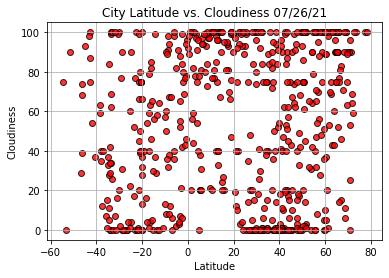

In [29]:
plt.scatter(weather_data["Latitude"], 
            weather_data["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities", color ='red')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {time.strftime('%m/%d/%y')}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsCloudiness.png")

### This plot shows that there are many cities that have 0% cloudiness and 100% cloudiness and it doesn´t depend of the lalitude

## Latitude vs. Wind Speed Plot

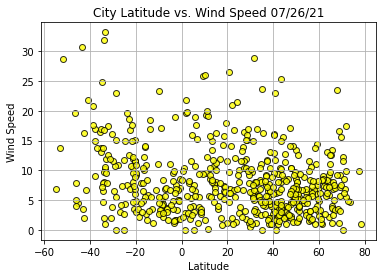

In [30]:
plt.scatter(weather_data["Latitude"], 
            weather_data["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities", color = 'yellow')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {time.strftime('%m/%d/%y')}")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
#sns.set()

# Save the figure
plt.savefig("LatitudevsWindSpeed.png")

### The wind speed is between 0 and 15 mph in most of the cities. This doesn´t depend of the latitude either.

## Linear Regression

In [31]:
#Create datafram for northern hemisphere and southern hemisphere
north_hemisphere = weather_data.loc[(weather_data['Latitude']>0)]
south_hemisphere = weather_data.loc[(weather_data['Latitude']<0)]

In [32]:
#Print north hemisphere dataframe
north_hemisphere

,City,Country,Date,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
1,deming,US,1627339976,91.29,32.2687,-107.7586,22,1,8.05
3,xingcheng,CN,1627339977,77.38,40.6167,120.7167,87,96,3.36
5,ilulissat,GL,1627339977,46.31,69.2167,-51.1000,93,100,9.22
6,college,US,1627339977,71.47,64.8569,-147.8028,49,75,8.05
7,la brea,HN,1627339978,87.31,15.8000,-85.9667,66,20,3.44
...,...,...,...,...,...,...,...,...,...
554,danville,US,1627339882,88.23,36.5860,-79.3950,75,90,4.61
555,mersing,MY,1627340116,76.91,2.4312,103.8405,94,44,5.75
556,san quintin,MX,1627340117,72.55,30.4833,-115.9500,71,18,10.27
557,zacualpan,MX,1627340117,86.72,21.2500,-105.1667,79,92,6.15


In [33]:
#Print south hemisphere dataframe
south_hemisphere

,City,Country,Date,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
0,puerto ayora,EC,1627339976,76.96,-0.7393,-90.3518,83,46,7.00
2,castro,BR,1627339976,58.44,-24.7911,-50.0119,65,4,4.41
4,kavieng,PG,1627339977,83.66,-2.5744,150.7967,69,42,7.54
9,bealanana,MG,1627339978,56.86,-14.5500,48.7333,92,99,5.91
10,gunnedah,AU,1627339978,44.73,-30.9833,150.2500,84,16,1.99
...,...,...,...,...,...,...,...,...,...
538,mackay,AU,1627340112,67.05,-21.1500,149.2000,88,40,4.61
541,sao joao da barra,BR,1627340113,71.91,-21.6403,-41.0511,80,0,17.60
543,lichtenburg,ZA,1627340113,40.28,-26.1520,26.1597,48,4,7.43
545,plettenberg bay,ZA,1627340114,68.97,-34.0527,23.3716,34,29,16.80


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient (R^2) is = -0.6036187602943304


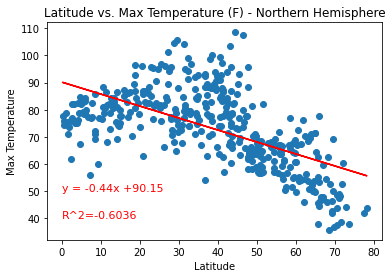

In [34]:
x_values = north_hemisphere['Latitude']
y_values = north_hemisphere['Temperature']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "R^2="+str(round(rvalue,4))
print(f"The correlation coefficient (R^2) is = {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=11,color="red")
plt.annotate(r2,(0,40),fontsize=11,color="red")
plt.title("Latitude vs. Max Temperature (F) - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

#print and save
plt.savefig ("LatitudevsMaxTemperature-NorthernHemisphere.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient (R^2) is = 0.7631648605658512


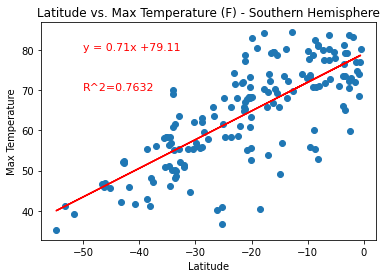

In [35]:
x_values = south_hemisphere['Latitude']
y_values = south_hemisphere['Temperature']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "R^2="+str(round(rvalue,4))
print(f"The correlation coefficient (R^2) is = {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=11,color="red")
plt.annotate(r2,(-50,70),fontsize=11,color="red")
plt.title("Latitude vs. Max Temperature (F) - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

#print and save
plt.savefig ("LatitudevsMaxTemperature-SouthernHemisphere.png")
plt.show()

### The Northern Hemisphere plot showed that the relationship between latitude and temperature is negative, meaning that the greater the latitude the temperature is going to be lower. However, in the southern hemisphere, the regression is positive, showing that the temperature increases when the latitude increases. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (R^2) is = -0.0005481452029000993


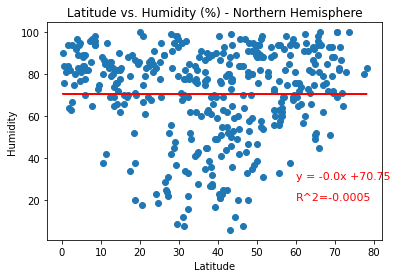

In [36]:
x_values = north_hemisphere['Latitude']
y_values = north_hemisphere['Humidity']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "R^2="+str(round(rvalue,4))
print(f"The correlation coefficient (R^2) is = {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,30),fontsize=11,color="red")
plt.annotate(r2,(60,20),fontsize=11,color="red")
plt.title("Latitude vs. Humidity (%) - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#print and save
plt.savefig ("LatitudevsHumidity-NorthernHemisphere.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (R^2) is = 0.07301961021560592


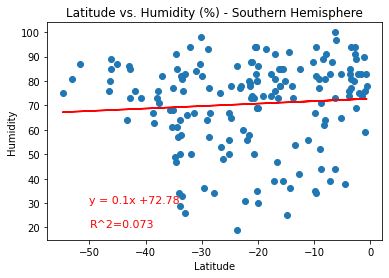

In [37]:
x_values = south_hemisphere['Latitude']
y_values = south_hemisphere['Humidity']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "R^2="+str(round(rvalue,4))
print(f"The correlation coefficient (R^2) is = {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=11,color="red")
plt.annotate(r2,(-50,20),fontsize=11,color="red")
plt.title("Latitude vs. Humidity (%) - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#print and save
plt.savefig ("LatitudevsHumidity-SouthernHemisphere.png")
plt.show()

### Both plots show that the lalitude doesn´t influence the humidity as much. As we can see the coefficient is very low in both hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (R^2) is = -0.04589059287562854


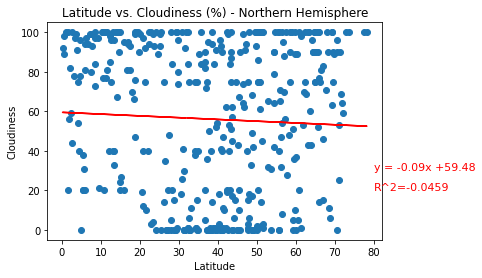

In [38]:
x_values = north_hemisphere['Latitude']
y_values = north_hemisphere['Cloudiness']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "R^2="+str(round(rvalue,4))
print(f"The correlation coefficient (R^2) is = {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,30),fontsize=11,color="red")
plt.annotate(r2,(80,20),fontsize=11,color="red")
plt.title("Latitude vs. Cloudiness (%) - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#print and save
plt.savefig ("LatitudevsCloudiness-NorthernHemisphere.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (R^2) is = 0.05580523776223993


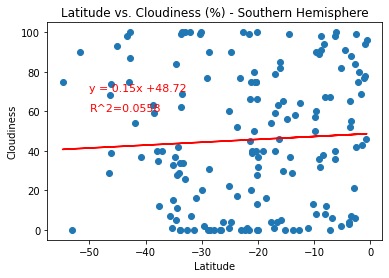

In [39]:
x_values = south_hemisphere['Latitude']
y_values = south_hemisphere['Cloudiness']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "R^2="+str(round(rvalue,4))
print(f"The correlation coefficient (R^2) is = {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,70),fontsize=11,color="red")
plt.annotate(r2,(-50,60),fontsize=11,color="red")
plt.title("Latitude vs. Cloudiness (%) - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#print and save
plt.savefig ("LatitudevsCloudiness-SouthernHemisphere.png")
plt.show()

### Both in the northern and southern hemispheres, the latitude has a low influence in the cloudiness. According to the linear regression every time latitude goes down, cloudiness goes down.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (R^2) is = -0.1612754016396364


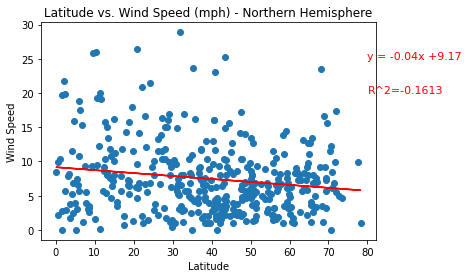

In [40]:
x_values = north_hemisphere['Latitude']
y_values = north_hemisphere['Wind Speed']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "R^2="+str(round(rvalue,4))
print(f"The correlation coefficient (R^2) is = {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,25),fontsize=11,color="red")
plt.annotate(r2,(80,20),fontsize=11,color="red")
plt.title("Latitude vs. Wind Speed (mph) - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#print and save
plt.savefig ("LatitudevsWind Speed-NorthernHemisphere.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (R^2) is = -0.39363561410781545


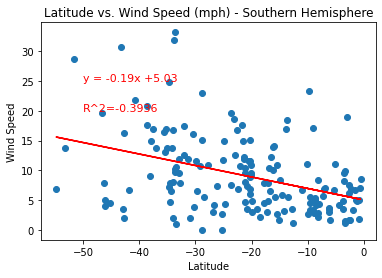

In [41]:
x_values = south_hemisphere['Latitude']
y_values = south_hemisphere['Wind Speed']

#Build parameters for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "R^2="+str(round(rvalue,4))
print(f"The correlation coefficient (R^2) is = {rvalue}")

#create graphic with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=11,color="red")
plt.annotate(r2,(-50,20),fontsize=11,color="red")
plt.title("Latitude vs. Wind Speed (mph) - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#print and save
plt.savefig ("LatitudevsWindSpeed-SouthernHemisphere.png")
plt.show()

### Both graphics show that the latitude and the wind speed in both hemisphere has a negative relationship, showing that everytime the lalitude decrease the wind speed also decrease. In the Southern Hemisohere graphic, the relationship is more remarkable but in the Northen Hemisphere.